In [1]:
import mne
import os
import os.path as op
import numpy as np
import pandas as pd
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs


In [2]:
%matplotlib qt

In [9]:
raw = mne.io.read_raw_brainvision('C:/Users/User/Downloads/FX48.vhdr', preload = True)

Extracting parameters from C:/Users/User/Downloads/FX48.vhdr...
Setting channel info structure...
Reading 0 ... 781799  =      0.000 ...  1563.598 secs...


Using matplotlib as 2D backend.


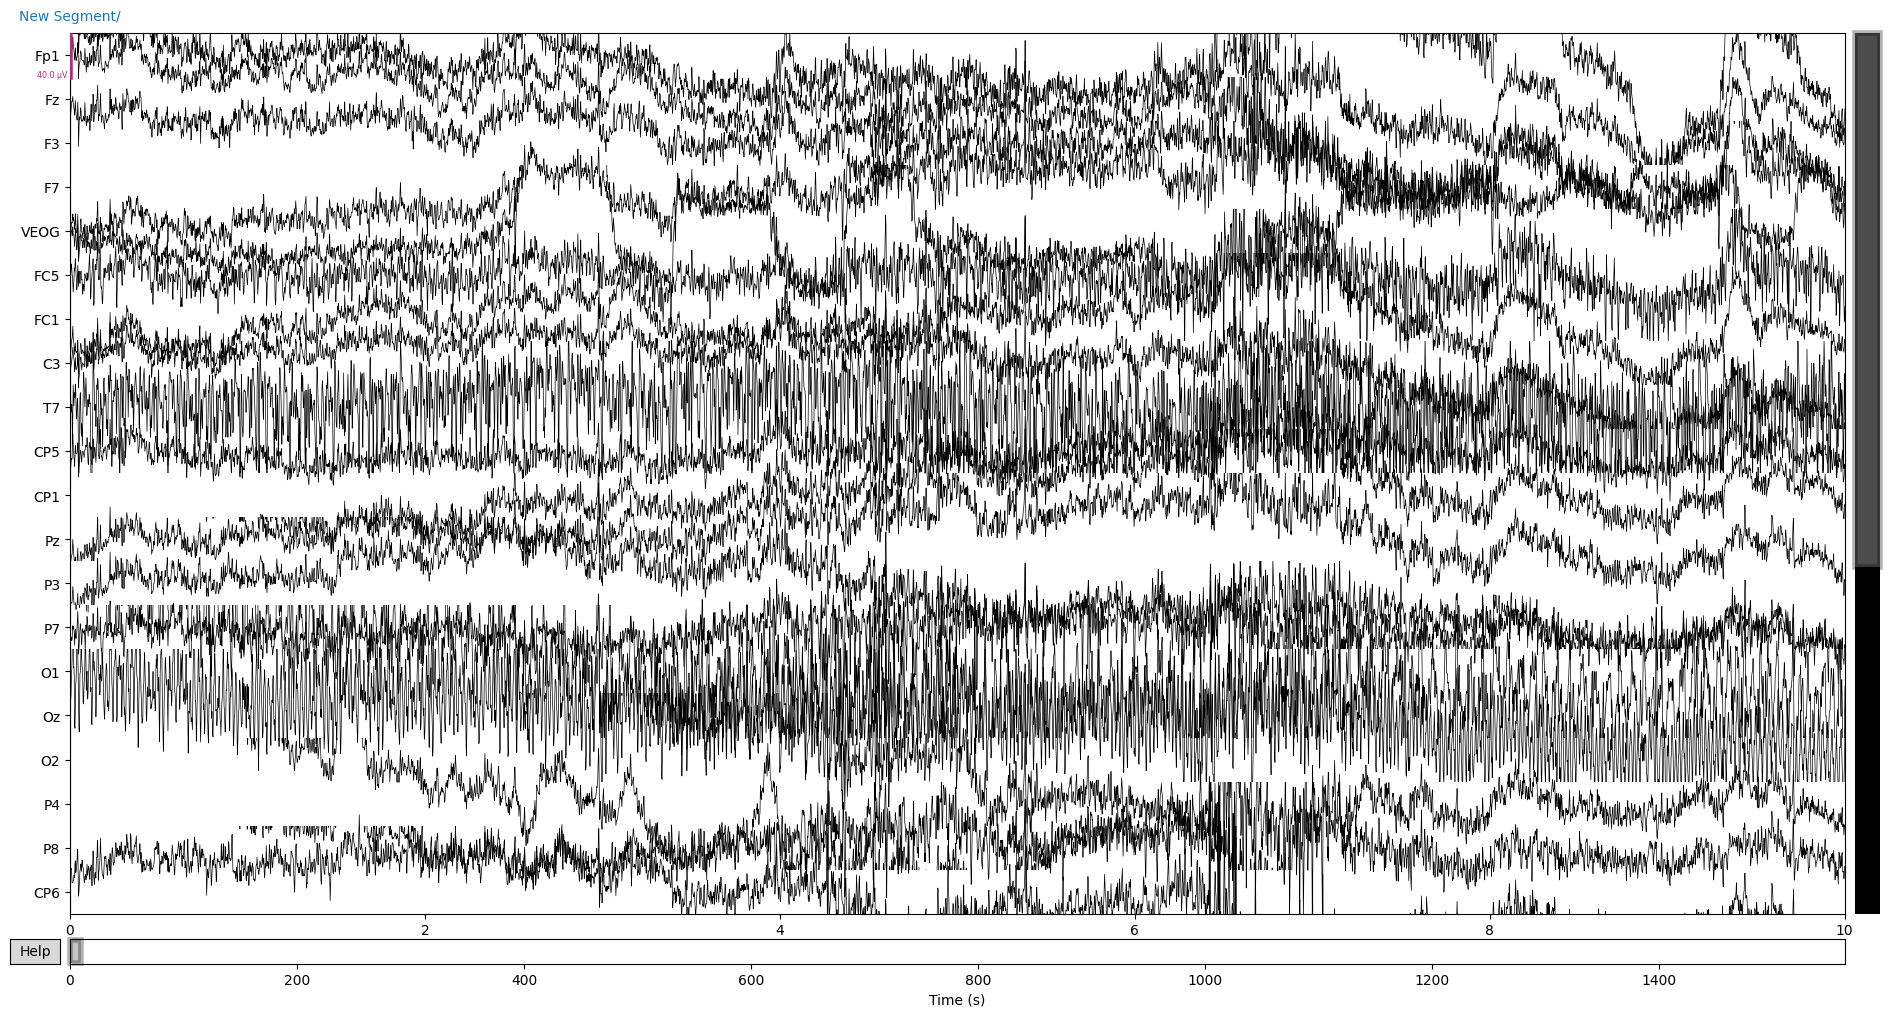

In [4]:
raw.plot()

In [26]:
raw = raw.rename_channels(mapping = {'FP2' : 'Fp2'})

In [27]:
raw = raw.pick(picks = ['eeg'], exclude = ['VEOG', 'HEOG', 'mark', 'pletism', 'KGR'])

In [28]:
raw.set_montage(montage='standard_1020')

<RawBrainVision | FX48.eeg, 28 x 781800 (1563.6 s), ~167.0 MB, data loaded>

In [29]:
raw = raw.filter(l_freq = 1, h_freq = 30, picks='eeg')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [30]:
raw.pick("eeg")

<RawBrainVision | FX48.eeg, 28 x 781800 (1563.6 s), ~167.0 MB, data loaded>

In [39]:
ica = ICA(n_components=20, max_iter="auto", random_state=97)
ica.fit(raw)
ica

Fitting ICA to data using 28 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 24.2s.


<ICA | raw data decomposition, method: fastica (fit in 39 iterations on 781800 samples), 20 ICA components (28 PCA components available), channel types: eeg, no sources marked for exclusion>

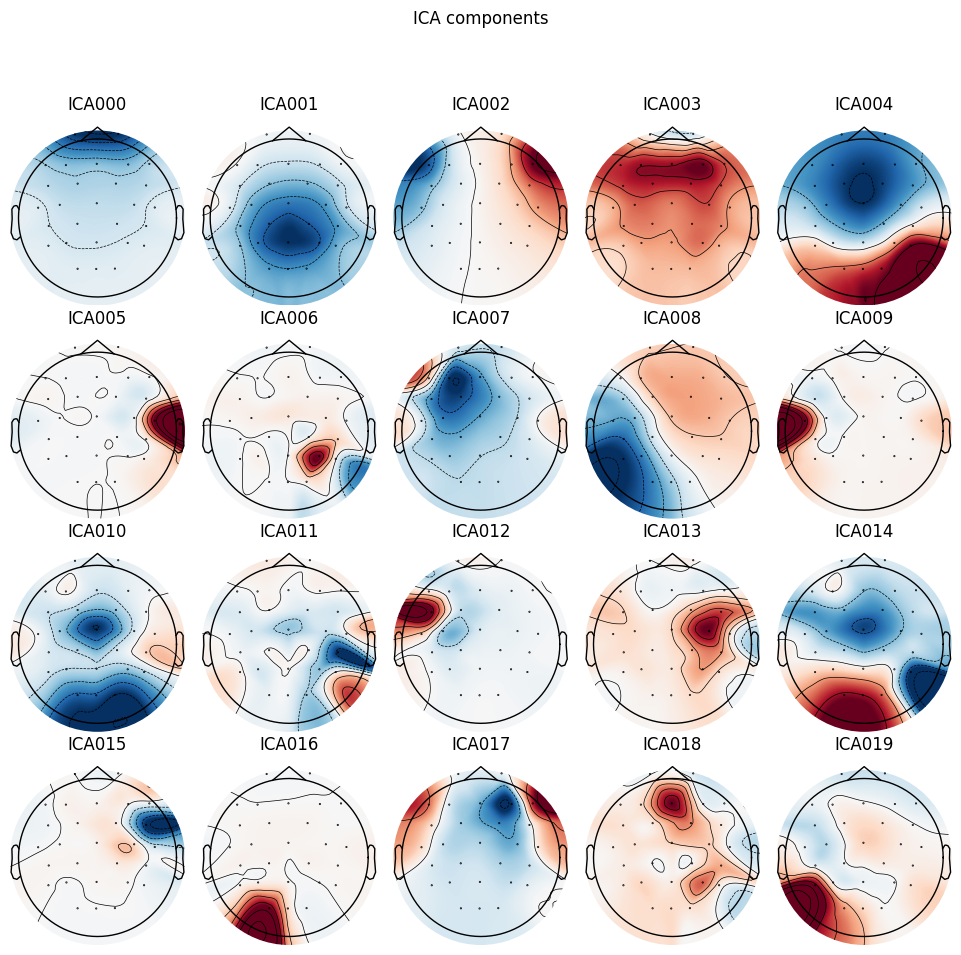

In [40]:
ica.plot_components()

Creating RawArray with float64 data, n_channels=20, n_times=781800
    Range : 0 ... 781799 =      0.000 ...  1563.598 secs
Ready.


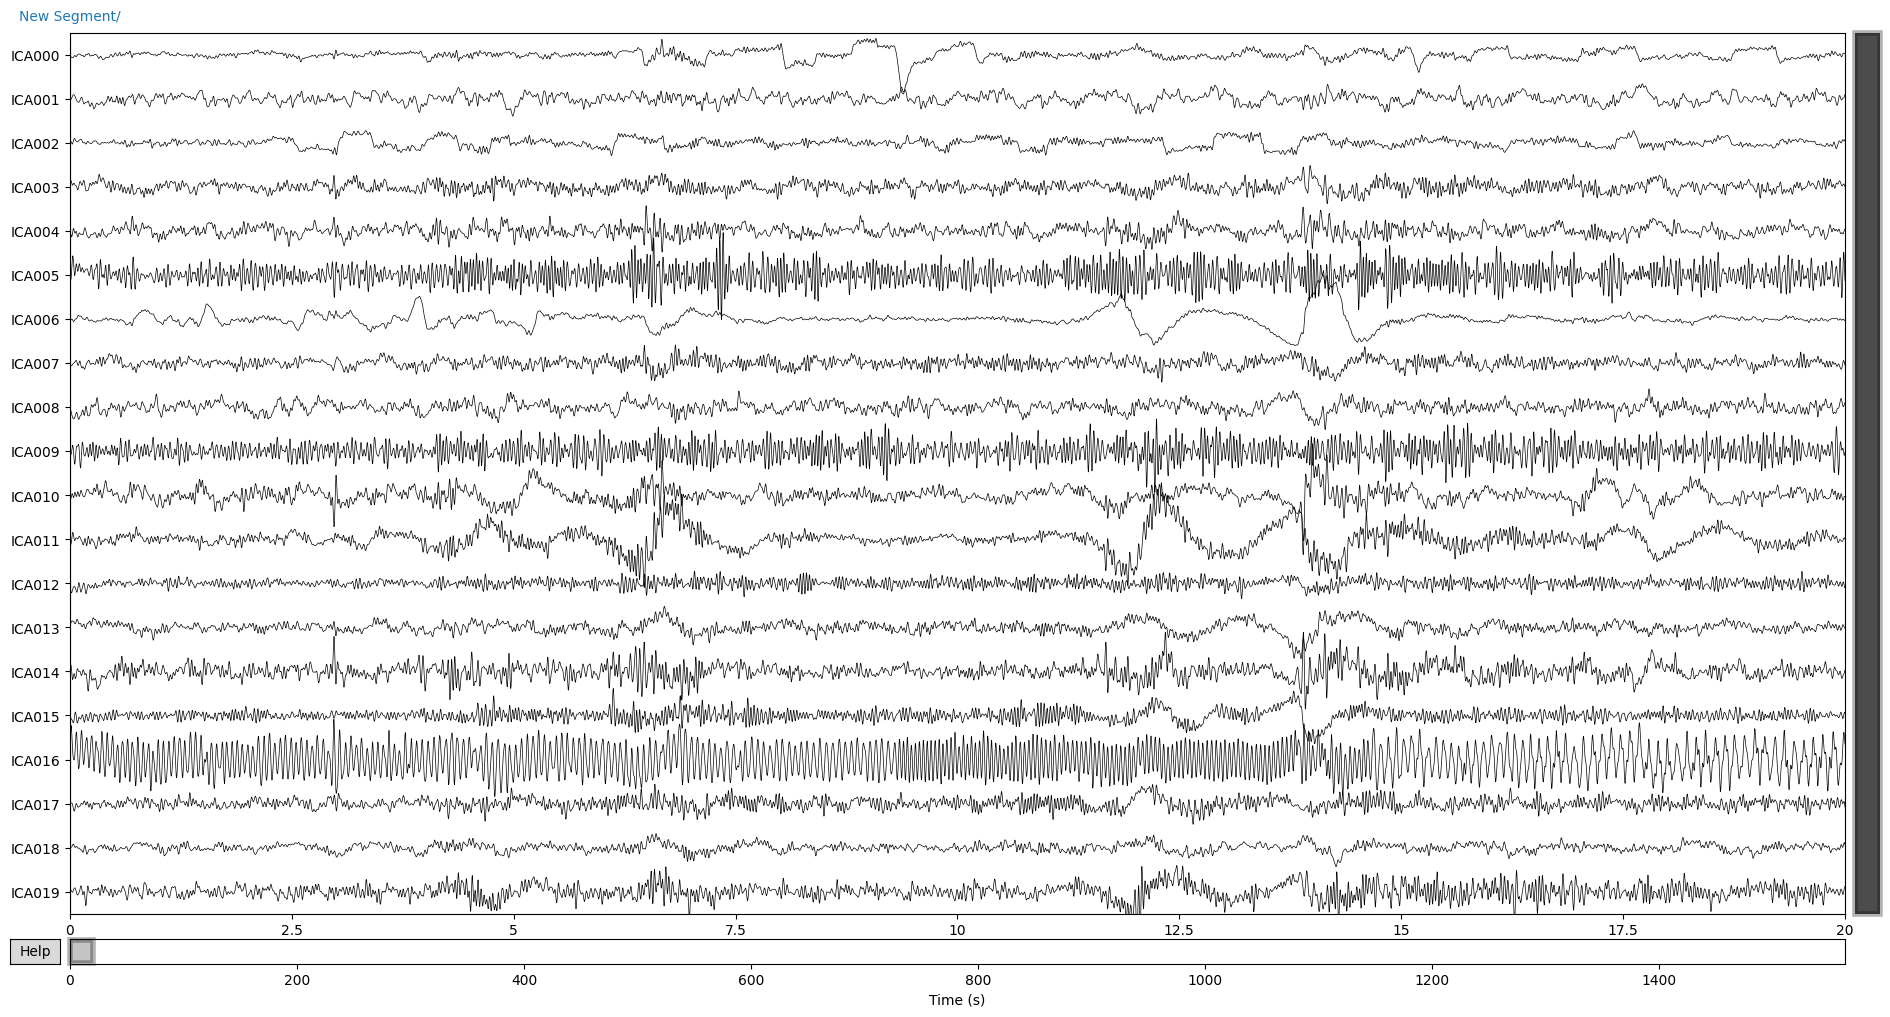

In [41]:
ica.plot_sources(raw)

In [42]:
ica.exclude = [0,1, 4, 6,19]

In [43]:
raw_reconst = ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 28 PCA components


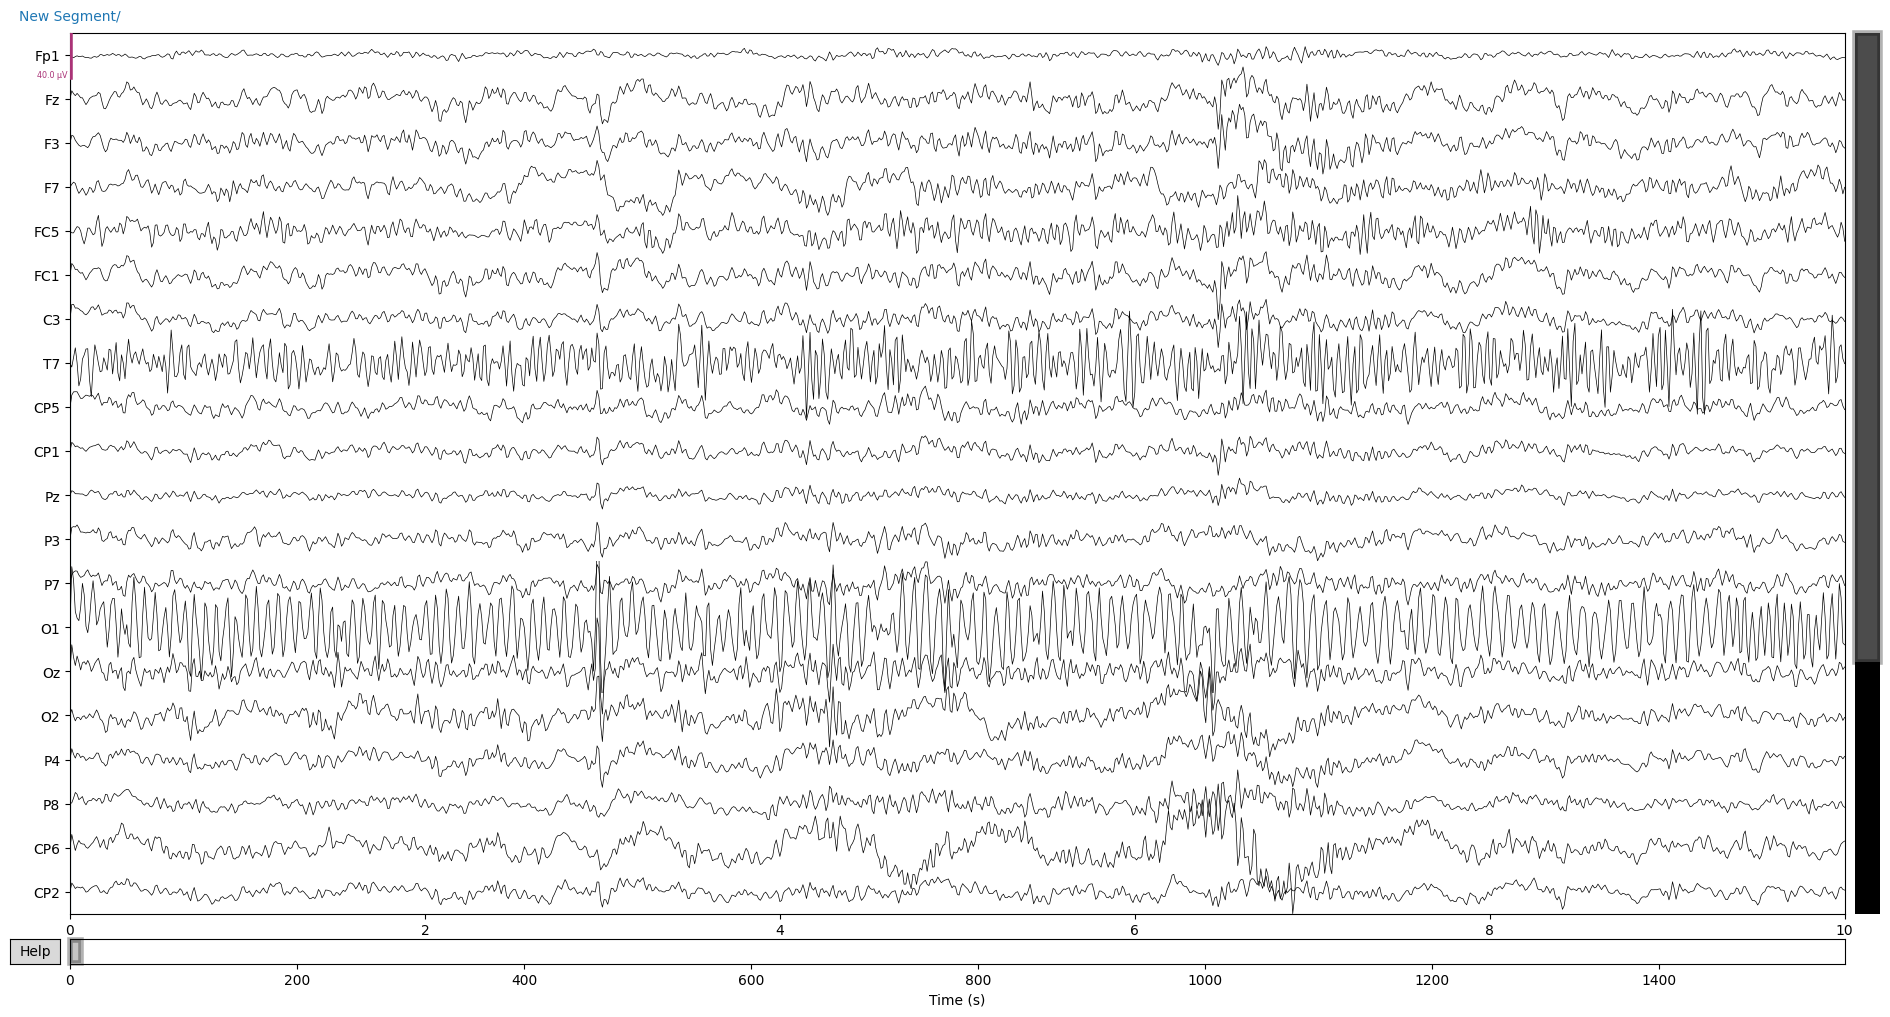

In [44]:
raw_reconst.plot()

In [38]:
raw_reconst.save('D:/hse/psychodelic_like_experience/data_processing/eeg_cleaned_ica/FX48.fif', overwrite=True)

Overwriting existing file.
Writing D:\hse\psychodelic_like_experience\data_processing\eeg_cleaned_ica\FX48.fif


C:\Users\User\AppData\Local\Temp\ipykernel_10172\1663464545.py:1: RuntimeWarning: This filename (D:\hse\psychodelic_like_experience\data_processing\eeg_cleaned_ica\FX48.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_reconst.save('D:/hse/psychodelic_like_experience/data_processing/eeg_cleaned_ica/FX48.fif', overwrite=True)


Closing D:\hse\psychodelic_like_experience\data_processing\eeg_cleaned_ica\FX48.fif
[done]
